Class distribution of diagnosis_1:
diagnosis_1
0.0    0.963748
1.0    0.036252
Name: proportion, dtype: float64

Precision @ 0.5: 0.8181818181818182
Recall    @ 0.5: 0.007334963325183374


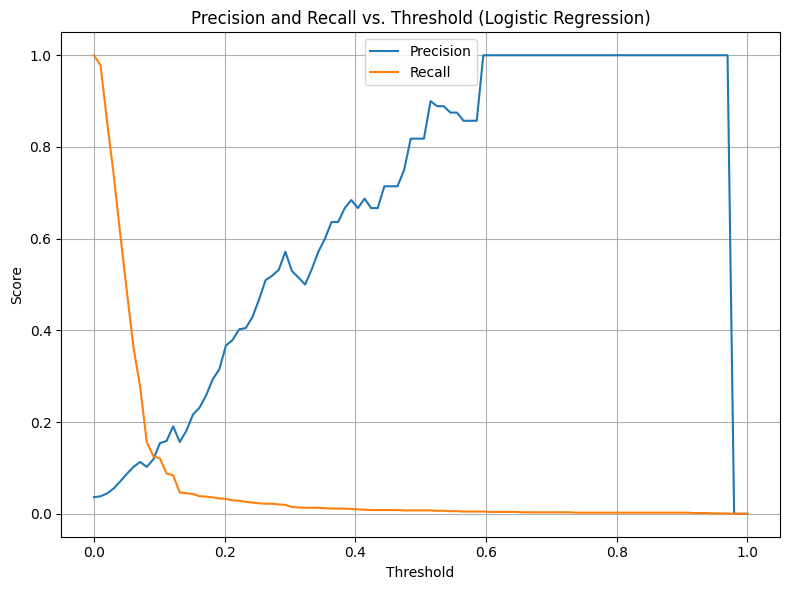

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# Load the dataset
df = pd.read_csv("train_meta.csv")

# Convert relevant columns to numeric
df["age_approx"] = pd.to_numeric(df["age_approx"], errors="coerce")
df["clin_size_long_diam_mm"] = pd.to_numeric(df["clin_size_long_diam_mm"], errors="coerce")
df["sex"] = pd.to_numeric(df["sex"], errors="coerce")
df["diagnosis_1"] = pd.to_numeric(df["diagnosis_1"], errors="coerce")

# Replace missing values in 'clin_size_long_diam_mm' with column mean (correct syntax)
df["clin_size_long_diam_mm"] = df["clin_size_long_diam_mm"].fillna(df["clin_size_long_diam_mm"].mean())

# Drop rows where 'sex' is missing
df = df.dropna(subset=["sex"])

# Drop rows with missing values in other required columns
df = df.dropna(subset=["age_approx", "diagnosis_1"])

# Optional: Downsample to reduce memory load
df = df.iloc[::10, :]

# Check class balance
print("Class distribution of diagnosis_1:")
print(df["diagnosis_1"].value_counts(normalize=True))

# Define features and target
X = df[["age_approx", "clin_size_long_diam_mm", "sex"]]
y = df["diagnosis_1"]

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Predict probabilities
y_pred_proba = model.predict_proba(X)[:, 1]  # Probability for class 1

# Compute precision and recall over a range of thresholds
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []

for t in thresholds:
    y_pred_binary = (y_pred_proba >= t).astype(int)
    precisions.append(precision_score(y, y_pred_binary, zero_division=0))
    recalls.append(recall_score(y, y_pred_binary, zero_division=0))

# Print precision and recall at threshold = 0.5
print("\nPrecision @ 0.5:", precision_score(y, (y_pred_proba >= 0.5).astype(int), zero_division=0))
print("Recall    @ 0.5:", recall_score(y, (y_pred_proba >= 0.5).astype(int), zero_division=0))

# Plot the precision and recall curves
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
